### IMPORT LIBRARY AND SETUP FORMART DATA

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(suppress = True,threshold=1000)

### READ DATA FROM FILE

In [4]:
link = r"data_test_uv.CSV"
df = pd.read_csv(link)

In [5]:
df.head(10)

,CUOC_GOC_GPRS_210901,CUOC_GOC_GPRS_211001,CUOC_GOC_GPRS_211101,CUOC_GOC_GPRS_211201,CUOC_GOC_GPRS_220101,CUOC_GOC_GPRS_220201,CUOC_GOC_GPRS_220301,CUOC_GOC_GPRS_220401,CUOC_GOC_GPRS_220501,CUOC_GOC_GPRS_220601,...,TONG_TIEN_NAP_TOPUP_211101,TONG_TIEN_NAP_TOPUP_211201,TONG_TIEN_NAP_TOPUP_220101,TONG_TIEN_NAP_TOPUP_220201,TONG_TIEN_NAP_TOPUP_220301,TONG_TIEN_NAP_TOPUP_220401,TONG_TIEN_NAP_TOPUP_220501,TONG_TIEN_NAP_TOPUP_220601,TUOI_KHACH_HANG_cut_level_220601,user_id
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55 < X <= 65,702919000000.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45 < X <= 55,351597000000.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0 < X <= 15,723501000000.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,200000.00,0.00,260000.00,0.00,150000.00,10000.00,0 < X <= 15,420384000000.00
4,0.00,0.00,570.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,100000.00,0.00,0.00,100000.00,0.00,0.00,0.00,100000.00,25 < X <= 35,820782000000.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45 < X <= 55,839437000000.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,345000.00,250000.00,150000.00,0.00,0.00,25 < X <= 35,939039000000.00
7,0.00,0.00,0.00,0.00,0.00,90.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45 < X <= 55,27612020089.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,20000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35 < X <= 45,908914000000.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45 < X <= 55,237634000000.00


In [5]:
# Overlook of the data distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 182 entries, CUOC_GOC_GPRS_210901 to user_id
dtypes: float64(152), int64(9), object(21)
memory usage: 277.7+ MB


In [6]:
df.describe()

,CUOC_GOC_GPRS_210901,CUOC_GOC_GPRS_211001,CUOC_GOC_GPRS_211101,CUOC_GOC_GPRS_211201,CUOC_GOC_GPRS_220101,CUOC_GOC_GPRS_220201,CUOC_GOC_GPRS_220301,CUOC_GOC_GPRS_220401,CUOC_GOC_GPRS_220501,CUOC_GOC_GPRS_220601,...,TONG_TIEN_NAP_TOPUP_211001,TONG_TIEN_NAP_TOPUP_211101,TONG_TIEN_NAP_TOPUP_211201,TONG_TIEN_NAP_TOPUP_220101,TONG_TIEN_NAP_TOPUP_220201,TONG_TIEN_NAP_TOPUP_220301,TONG_TIEN_NAP_TOPUP_220401,TONG_TIEN_NAP_TOPUP_220501,TONG_TIEN_NAP_TOPUP_220601,user_id
count,199863.00,199876.00,199901.00,199920.00,199944.00,199897.00,199958.00,199976.00,199989.00,200000.00,...,199876.00,199901.00,199920.00,199944.00,199897.00,199958.00,199976.00,199989.00,200000.00,200000.00
mean,39.25,61.18,59.80,73.11,62.56,80.37,83.38,71.84,76.51,82.01,...,27416.60,28236.70,20793.49,34306.03,27511.02,30203.77,30255.80,30327.83,29578.37,500289305055.17
std,1499.07,2642.15,2076.94,5502.89,2369.25,3368.54,3421.20,2524.83,2450.31,3073.39,...,77178.22,76702.25,66118.05,93372.22,80468.41,79334.04,78921.14,82457.88,77005.97,288430621848.47
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,12540981.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,250523750000.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,499787500000.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10000.00,10000.00,0.00,30000.00,10000.00,20000.00,20000.00,20000.00,20000.00,750460750000.00
max,280393.00,571700.80,334516.60,2131197.20,445227.20,635709.80,520590.40,525467.40,340352.28,564378.75,...,8010000.00,6280000.00,4400000.00,10050000.00,8500000.00,3480000.00,6500000.00,11840000.00,6700000.00,999988000000.00


In [7]:
### Check null value

In [8]:
# Show the rate of null values per column
df.isnull().mean()


CUOC_GOC_GPRS_210901               0.00
CUOC_GOC_GPRS_211001               0.00
CUOC_GOC_GPRS_211101               0.00
CUOC_GOC_GPRS_211201               0.00
CUOC_GOC_GPRS_220101               0.00
                                   ... 
TONG_TIEN_NAP_TOPUP_220401         0.00
TONG_TIEN_NAP_TOPUP_220501         0.00
TONG_TIEN_NAP_TOPUP_220601         0.00
TUOI_KHACH_HANG_cut_level_220601   0.00
user_id                            0.00
Length: 182, dtype: float64

In [9]:
# Check the columns has the rate of null values >1
df.isnull().mean().loc[lambda x : x >1]

Series([], dtype: float64)

In [10]:
# There is no column which has rate of null values >1 so just drop all null values
df.dropna(inplace =True)

### EDA Data

### By time

In [11]:
df_sim = df[['IS_SIM_4G_210901',
             'IS_SIM_4G_211001',
             'IS_SIM_4G_211101',
             'IS_SIM_4G_211201',
             'IS_SIM_4G_220101',
             'IS_SIM_4G_220201',
             'IS_SIM_4G_220301',
             'IS_SIM_4G_220401',
             'IS_SIM_4G_220501',
             'IS_SIM_4G_220601']].sum(axis = 0)
df_sim = df_sim.to_frame().reset_index()
df_sim[0]

0   185168.00
1   185435.00
2   185682.00
3   185876.00
4   186016.00
5   186167.00
6   186376.00
7   186607.00
8   186782.00
9   187273.00
Name: 0, dtype: float64

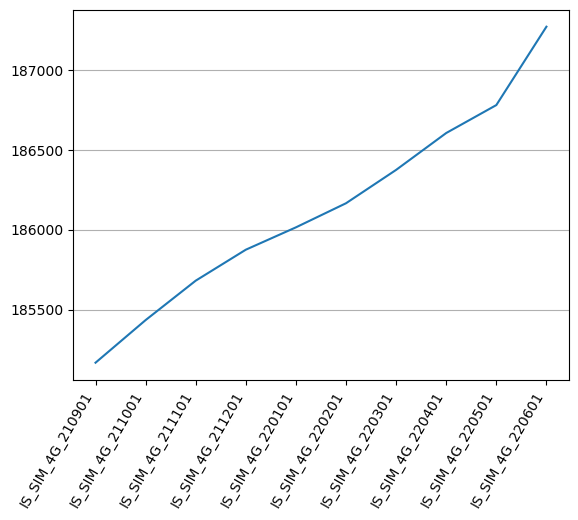

In [12]:
plt.plot(df_sim['index'],df_sim[0])
plt.grid(axis='y')
plt.xticks(rotation=60,ha='right')
plt.show()

In [13]:
df_thuc = df[['thuc_4g_210901',
 'thuc_4g_211001',
 'thuc_4g_211101',
 'thuc_4g_211201',
 'thuc_4g_220101',
 'thuc_4g_220201',
 'thuc_4g_220301',
 'thuc_4g_220401',
 'thuc_4g_220501',
 'thuc_4g_220601']].sum(axis = 0)
df_thuc = df_thuc.to_frame().reset_index()
df_thuc[0]

0   89229.00
1   93795.00
2   95052.00
3   97277.00
4   98408.00
5   97680.00
6   98428.00
7   98760.00
8   99399.00
9   99016.00
Name: 0, dtype: float64

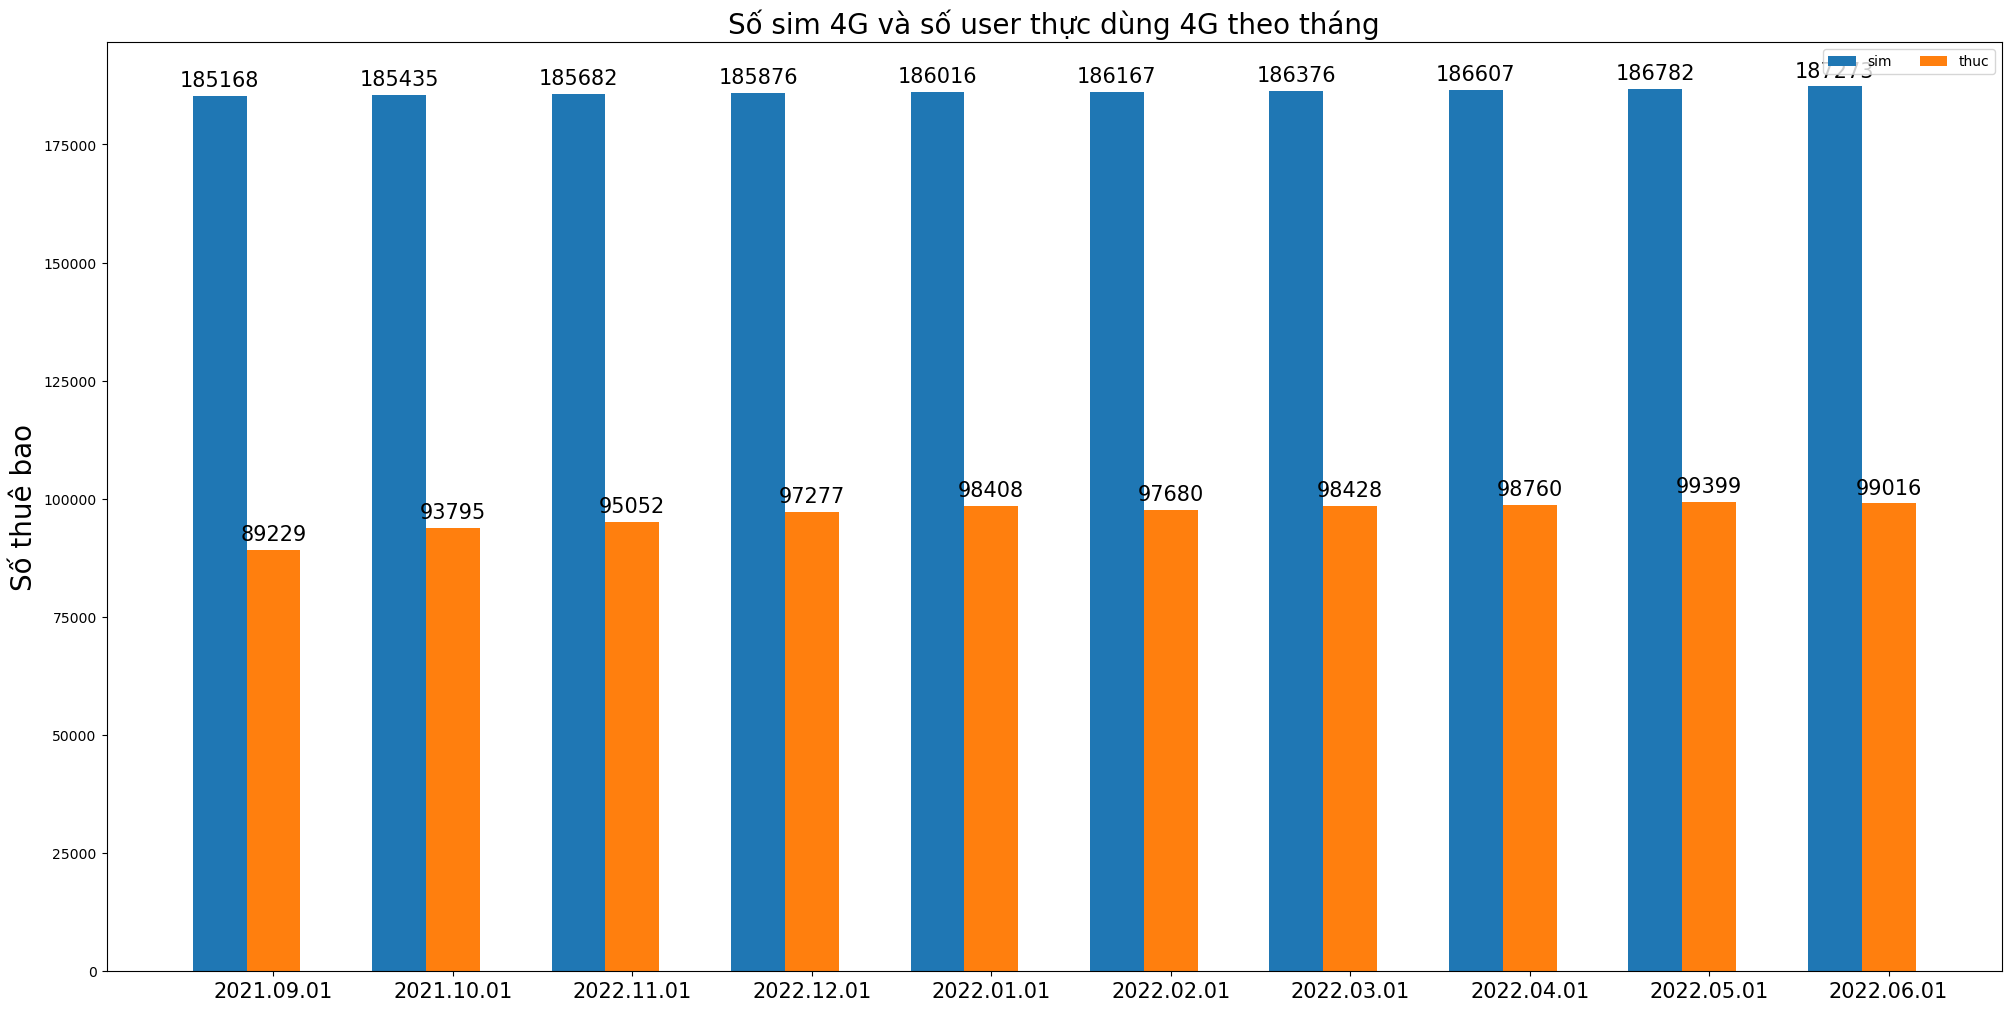

In [14]:
list_date = ('2021.09.01','2021.10.01','2022.11.01','2022.12.01',
     '2022.01.01','2022.02.01','2022.03.01','2022.04.01',
    '2022.05.01','2022.06.01')
dict_sim_thuc = {'sim': df_sim[0], 'thuc': df_thuc[0]}

x = np.arange(len(list_date))  # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize = (20,10))

for attribute, measurement in dict_sim_thuc.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4,fontsize=15)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Số thuê bao',fontsize=20)
ax.set_title('Số sim 4G và số user thực dùng 4G theo tháng',fontsize=20)
ax.set_xticks(x + width, list_date ,fontsize=15)
ax.legend(loc='upper right', ncols = 2)
plt.show()

### is_sim_4g_220601: Khách hàng đã có SIM là SIM 4G (Điều kiện cần để TB có thể chuyển lên hạ tầng 4G)


In [15]:
# bnh KH sử dụng sim 4g và khác 4g? 
# dự báo kh 3g 3g chuyển sang 4G
# fill null các trg biến liên tục theo pandas.DataFrame.interpolate
# xác định lượng null ở các trg objects

### Model


In [16]:
numbers = [f for f in df.columns if df.dtypes[f]!='object']
objects = [f for f in df.columns if df.dtypes[f]=='object']

In [17]:
objects


['HA_TANG_210901',
 'HA_TANG_211001',
 'HA_TANG_211101',
 'HA_TANG_211201',
 'HA_TANG_220101',
 'HA_TANG_220201',
 'HA_TANG_220301',
 'HA_TANG_220401',
 'HA_TANG_220501',
 'HA_TANG_220601',
 'THIET_BI_210901',
 'THIET_BI_211001',
 'THIET_BI_211101',
 'THIET_BI_211201',
 'THIET_BI_220101',
 'THIET_BI_220201',
 'THIET_BI_220301',
 'THIET_BI_220401',
 'THIET_BI_220501',
 'THIET_BI_220601',
 'TUOI_KHACH_HANG_cut_level_220601']

In [18]:
i=1
for obj in objects:
    print(i, '/', obj, '\t', len(df[obj].unique()) , ':', df[obj].unique())
    i+=1

1 / HA_TANG_210901 	 4 : ['-1G' '2G' '4G' '3G']
2 / HA_TANG_211001 	 4 : ['-1G' '2G' '4G' '3G']
3 / HA_TANG_211101 	 4 : ['-1G' '2G' '4G' '3G']
4 / HA_TANG_211201 	 4 : ['-1G' '2G' '4G' '3G']
5 / HA_TANG_220101 	 4 : ['G' '2G' '4G' '3G']
6 / HA_TANG_220201 	 4 : ['G' '2G' '4G' '3G']
7 / HA_TANG_220301 	 4 : ['G' '2G' '4G' '3G']
8 / HA_TANG_220401 	 4 : ['G' '2G' '4G' '3G']
9 / HA_TANG_220501 	 4 : ['G' '2G' '4G' '3G']
10 / HA_TANG_220601 	 4 : ['G' '2G' '4G' '3G']
11 / THIET_BI_210901 	 4 : ['Unknown' '2G' '4G' '3G']
12 / THIET_BI_211001 	 5 : ['Unknown' '2G' '4G' '5G' '3G']
13 / THIET_BI_211101 	 5 : ['Unknown' '2G' '4G' '3G' '5G']
14 / THIET_BI_211201 	 5 : ['Unknown' '2G' '4G' '5G' '3G']
15 / THIET_BI_220101 	 5 : ['Unknown' '2G' '4G' '5G' '3G']
16 / THIET_BI_220201 	 5 : ['Unknown' '2G' '4G' '5G' '3G']
17 / THIET_BI_220301 	 5 : ['Unknown' '2G' '4G' '3G' '5G']
18 / THIET_BI_220401 	 5 : ['Unknown' '2G' '4G' '3G' '5G']
19 / THIET_BI_220501 	 5 : ['Unknown' '2G' '4G' '5G' '3G']
20 / 

In [19]:
i=1
for obj in numbers:
    print(i, '/', obj, '\t', len(df[obj].unique()), ':', df[obj].unique()[:5])
    i+=1

1 / CUOC_GOC_GPRS_210901 	 694 : [   0.    50.    32.5 6505.  5772.5]
2 / CUOC_GOC_GPRS_211001 	 793 : [   0.     5.   895.  5455.  6197.5]
3 / CUOC_GOC_GPRS_211101 	 773 : [   0.   570.   150.   322.5 3225. ]
4 / CUOC_GOC_GPRS_211201 	 747 : [   0.    90.  3550.  5820.     2.5]
5 / CUOC_GOC_GPRS_220101 	 739 : [   0.   782.5 1490.   300.  5482.5]
6 / CUOC_GOC_GPRS_220201 	 781 : [   0.    90.   622.5 1367.5 2832.5]
7 / CUOC_GOC_GPRS_220301 	 810 : [   0.  1080.  6040.   177.5 6565. ]
8 / CUOC_GOC_GPRS_220401 	 805 : [   0.  7587.5   57.5  165.  5292.5]
9 / CUOC_GOC_GPRS_220501 	 830 : [   0.  1467.5 7500.  1960.  5457.5]
10 / CUOC_GOC_GPRS_220601 	 830 : [   0.  1302.5 8657.5   10.  5400. ]
11 / IS_DCOM_210901 	 6 : [-1.  1.  0.  4.  2.]
12 / IS_DCOM_211001 	 6 : [-1.  1.  0.  4.  2.]
13 / IS_DCOM_211101 	 6 : [-1.  1.  0.  4.  2.]
14 / IS_DCOM_211201 	 6 : [-1.  1.  0.  4.  2.]
15 / IS_DCOM_220101 	 6 : [-1.  1.  0.  4.  2.]
16 / IS_DCOM_220201 	 6 : [-1.  1.  0.  4.  2.]
17 / IS_DCO

142 / TONG_TIEN_NAP_THE_211001 	 428 : [     0. 120000.  60000.  10000. 160000.]
143 / TONG_TIEN_NAP_THE_211101 	 435 : [     0. 100000. 150000.  20000.  10000.]
144 / TONG_TIEN_NAP_THE_211201 	 426 : [     0. 320000.  20000.  60000. 190000.]
145 / TONG_TIEN_NAP_THE_220101 	 457 : [     0. 200000.  20000. 140000.  60000.]
146 / TONG_TIEN_NAP_THE_220201 	 403 : [     0. 100000. 345000. 130000.  30000.]
147 / TONG_TIEN_NAP_THE_220301 	 406 : [     0. 260000. 250000.  50000.  10000.]
148 / TONG_TIEN_NAP_THE_220401 	 389 : [     0. 150000.  11000.  40000.  90000.]
149 / TONG_TIEN_NAP_THE_220501 	 401 : [     0. 150000.  20000.  40000.  70000.]
150 / TONG_TIEN_NAP_THE_220601 	 366 : [     0. 110000. 100000.  30000.  12000.]
151 / TONG_TIEN_NAP_TOPUP_210901 	 280 : [     0.  20000. 260000.  30000.  50000.]
152 / TONG_TIEN_NAP_TOPUP_211001 	 302 : [     0.  20000. 100000.  10000.  50000.]
153 / TONG_TIEN_NAP_TOPUP_211101 	 310 : [     0. 100000.  20000.  70000. 120000.]
154 / TONG_TIEN_NAP_TO

In [20]:
# tạo cột

In [21]:
# phân nhóm ha tầng >= 4G và <4G

In [22]:
df.isnull().mean()*100 > 1

CUOC_GOC_GPRS_210901                False
CUOC_GOC_GPRS_211001                False
CUOC_GOC_GPRS_211101                False
CUOC_GOC_GPRS_211201                False
CUOC_GOC_GPRS_220101                False
                                    ...  
TONG_TIEN_NAP_TOPUP_220401          False
TONG_TIEN_NAP_TOPUP_220501          False
TONG_TIEN_NAP_TOPUP_220601          False
TUOI_KHACH_HANG_cut_level_220601    False
user_id                             False
Length: 182, dtype: bool

In [23]:
rate_na = ((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(4)
df_rate_na = rate_na.to_frame(name = 'rate_na')
df_rate_na1= df_rate_na.reset_index()
df_rate_na1

,index,rate_na
0,CUOC_GOC_GPRS_210901,0.00
1,CUOC_GOC_GPRS_211001,0.00
2,CUOC_GOC_GPRS_211101,0.00
3,CUOC_GOC_GPRS_211201,0.00
4,CUOC_GOC_GPRS_220101,0.00
...,...,...
177,TONG_TIEN_NAP_TOPUP_220401,0.00
178,TONG_TIEN_NAP_TOPUP_220501,0.00
179,TONG_TIEN_NAP_TOPUP_220601,0.00
180,TUOI_KHACH_HANG_cut_level_220601,0.00


In [24]:
df_rate_na1.rename(columns = {'index':'columns'}, inplace = True)
df_rate_na1

,columns,rate_na
0,CUOC_GOC_GPRS_210901,0.00
1,CUOC_GOC_GPRS_211001,0.00
2,CUOC_GOC_GPRS_211101,0.00
3,CUOC_GOC_GPRS_211201,0.00
4,CUOC_GOC_GPRS_220101,0.00
...,...,...
177,TONG_TIEN_NAP_TOPUP_220401,0.00
178,TONG_TIEN_NAP_TOPUP_220501,0.00
179,TONG_TIEN_NAP_TOPUP_220601,0.00
180,TUOI_KHACH_HANG_cut_level_220601,0.00


In [25]:
df.isnull().mean()*100

CUOC_GOC_GPRS_210901               0.00
CUOC_GOC_GPRS_211001               0.00
CUOC_GOC_GPRS_211101               0.00
CUOC_GOC_GPRS_211201               0.00
CUOC_GOC_GPRS_220101               0.00
                                   ... 
TONG_TIEN_NAP_TOPUP_220401         0.00
TONG_TIEN_NAP_TOPUP_220501         0.00
TONG_TIEN_NAP_TOPUP_220601         0.00
TUOI_KHACH_HANG_cut_level_220601   0.00
user_id                            0.00
Length: 182, dtype: float64

In [26]:
 df1 = df[['thuc_4g_210901',
 'thuc_4g_211001',
 'thuc_4g_211101',
 'thuc_4g_211201',
 'thuc_4g_220101',
 'thuc_4g_220201',
 'thuc_4g_220301',
 'thuc_4g_220401',
 'thuc_4g_220501',
 'thuc_4g_220601','user_id']]
    
df1

,thuc_4g_210901,thuc_4g_211001,thuc_4g_211101,thuc_4g_211201,thuc_4g_220101,thuc_4g_220201,thuc_4g_220301,thuc_4g_220401,thuc_4g_220501,thuc_4g_220601,user_id
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,702919000000.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,351597000000.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,723501000000.00
3,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1,420384000000.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,820782000000.00
...,...,...,...,...,...,...,...,...,...,...,...
199995,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,601202000000.00
199996,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,964720000000.00
199997,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,395320096.00
199998,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,282686000000.00


In [27]:
df1[df1['user_id'] == 7.029190e+11]

,thuc_4g_210901,thuc_4g_211001,thuc_4g_211101,thuc_4g_211201,thuc_4g_220101,thuc_4g_220201,thuc_4g_220301,thuc_4g_220401,thuc_4g_220501,thuc_4g_220601,user_id
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,702919000000.00
29078,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,702919000000.00


In [28]:
df1['tong_thuc_4g'] = df[['thuc_4g_210901',
 'thuc_4g_211001',
 'thuc_4g_211101',
 'thuc_4g_211201',
 'thuc_4g_220101',
 'thuc_4g_220201',
 'thuc_4g_220301',
 'thuc_4g_220401',
 'thuc_4g_220501',
 'thuc_4g_220601']].sum(axis = 1)
df1['tong_thuc_4g'].value_counts()

0.00     66586
10.00    54627
9.00     14465
8.00      9591
1.00      9476
7.00      8401
2.00      7836
6.00      7515
3.00      7151
5.00      7063
4.00      7012
Name: tong_thuc_4g, dtype: int64

In [29]:
### Hành vi tiêu dùng theo thời gian

In [30]:
df['TONG_CUOC_GOC_FN_210901'].dtypes

dtype('float64')

In [31]:
df_sum_tong_chi_tieu = df[['TONG_CUOC_GOC_FN_210901',
 'TONG_CUOC_GOC_FN_211001',
 'TONG_CUOC_GOC_FN_211101',
 'TONG_CUOC_GOC_FN_211201',
 'TONG_CUOC_GOC_FN_220101',
 'TONG_CUOC_GOC_FN_220201',
 'TONG_CUOC_GOC_FN_220301',
 'TONG_CUOC_GOC_FN_220401',
 'TONG_CUOC_GOC_FN_220501',
 'TONG_CUOC_GOC_FN_220601']].sum()
df_sum_tong_chi_tieu = df_sum_tong_chi_tieu.reset_index()
df_sum_tong_chi_tieu.rename(columns = {'index': 'Tháng',0:'Tổng chi tiêu'})

,Tháng,Tổng chi tiêu
0,TONG_CUOC_GOC_FN_210901,10941181524.44
1,TONG_CUOC_GOC_FN_211001,12088840669.76
2,TONG_CUOC_GOC_FN_211101,12325477388.39
3,TONG_CUOC_GOC_FN_211201,12760547531.18
4,TONG_CUOC_GOC_FN_220101,13188676604.98
5,TONG_CUOC_GOC_FN_220201,12142558603.94
6,TONG_CUOC_GOC_FN_220301,12631736546.84
7,TONG_CUOC_GOC_FN_220401,12030036287.13
8,TONG_CUOC_GOC_FN_220501,12172408744.84
9,TONG_CUOC_GOC_FN_220601,11557596838.40


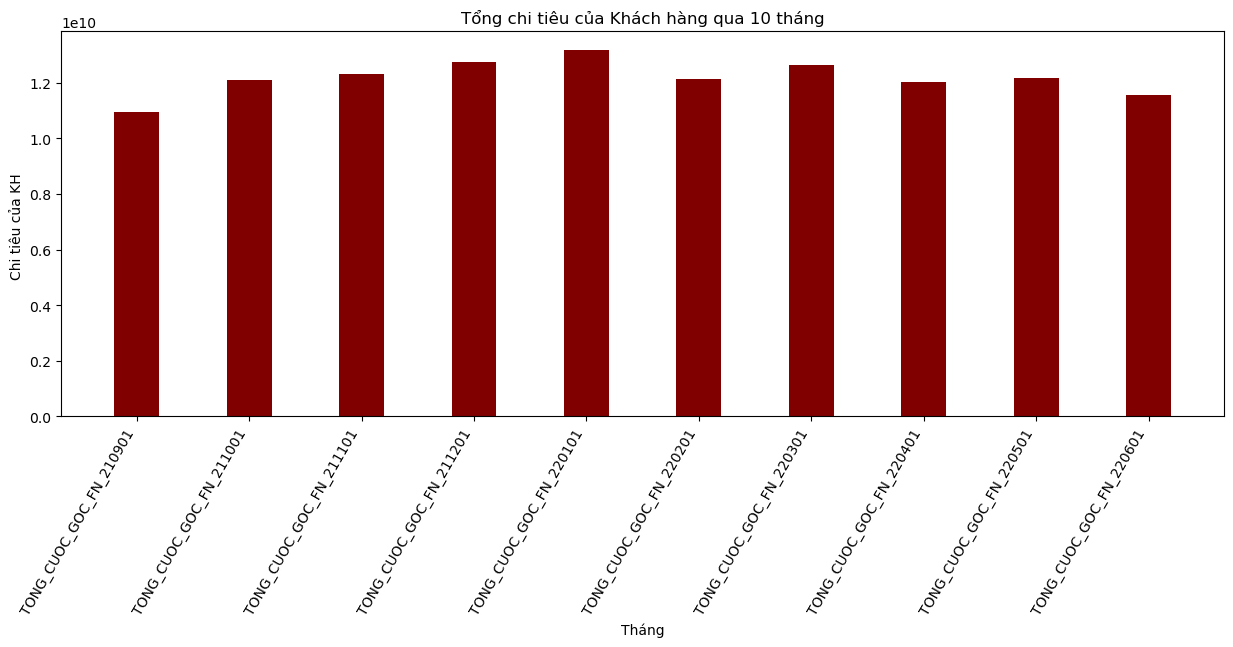

In [32]:
fig = plt.figure(figsize = (15, 5))
plt.bar(df_sum_tong_chi_tieu['index'], df_sum_tong_chi_tieu[0], color ='maroon',
        width = 0.4)
 
plt.xlabel("Tháng")
plt.ylabel("Chi tiêu của KH ")
plt.title("Tổng chi tiêu của Khách hàng qua 10 tháng")
plt.xticks(rotation=60, ha='right')
plt.show()

In [33]:
df_sum_tong_chi_tieu

,index,0
0,TONG_CUOC_GOC_FN_210901,10941181524.44
1,TONG_CUOC_GOC_FN_211001,12088840669.76
2,TONG_CUOC_GOC_FN_211101,12325477388.39
3,TONG_CUOC_GOC_FN_211201,12760547531.18
4,TONG_CUOC_GOC_FN_220101,13188676604.98
5,TONG_CUOC_GOC_FN_220201,12142558603.94
6,TONG_CUOC_GOC_FN_220301,12631736546.84
7,TONG_CUOC_GOC_FN_220401,12030036287.13
8,TONG_CUOC_GOC_FN_220501,12172408744.84
9,TONG_CUOC_GOC_FN_220601,11557596838.40


Text(0.5, 1.0, 'Tổng chi tiêu của khách hàng trong 10 tháng')

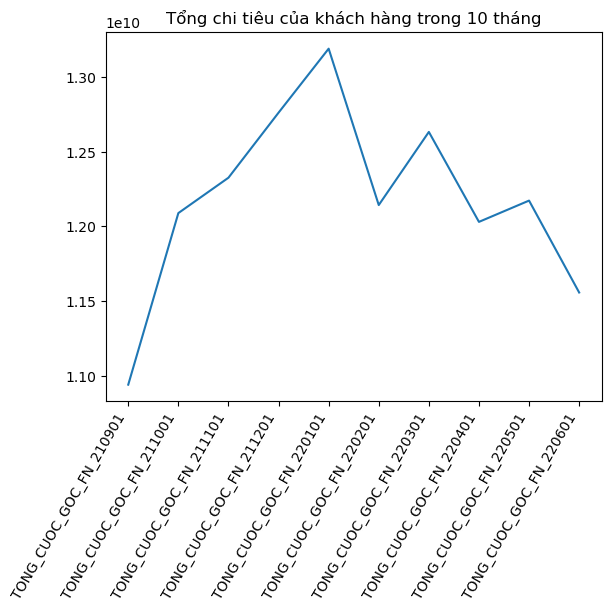

In [34]:
plt.plot(df_sum_tong_chi_tieu['index'],df_sum_tong_chi_tieu[0])
plt.xticks(rotation=60,ha='right')
plt.title('Tổng chi tiêu của khách hàng trong 10 tháng')

In [35]:
df_luu_luong_data = df[['TONG_LL_GPRS_210901',
 'TONG_LL_GPRS_211001',
 'TONG_LL_GPRS_211101',
 'TONG_LL_GPRS_211201',
 'TONG_LL_GPRS_220101',
 'TONG_LL_GPRS_220201',
 'TONG_LL_GPRS_220301',
 'TONG_LL_GPRS_220401',
 'TONG_LL_GPRS_220501',
 'TONG_LL_GPRS_220601']].sum()
df_luu_luong_data1 = df_luu_luong_data.reset_index()
df_luu_luong_data1.rename(columns = {'index': 'Tháng',0:'Lưu lượng data'})

,Tháng,Lưu lượng data
0,TONG_LL_GPRS_210901,977613418860343.00
1,TONG_LL_GPRS_211001,1069326854310959.00
2,TONG_LL_GPRS_211101,987413672072705.00
3,TONG_LL_GPRS_211201,1002761358547552.00
4,TONG_LL_GPRS_220101,986642402640301.00
5,TONG_LL_GPRS_220201,968479034135709.00
6,TONG_LL_GPRS_220301,1092983052080324.00
7,TONG_LL_GPRS_220401,1036439634737971.00
8,TONG_LL_GPRS_220501,1089714613569917.00
9,TONG_LL_GPRS_220601,1058508772387346.00


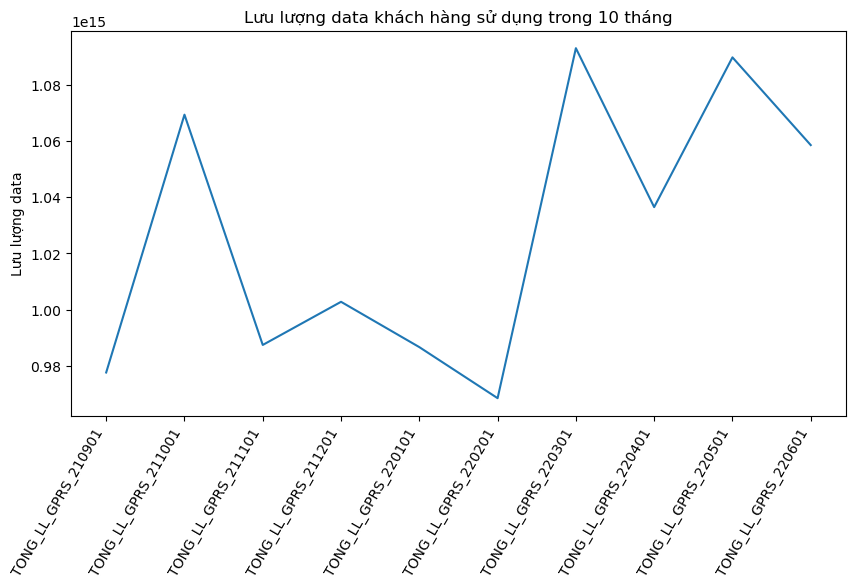

In [36]:
fig = plt.figure(figsize = (10, 5))
plt.plot(df_luu_luong_data)
plt.xticks(rotation=60,ha='right')
plt.ylabel("Lưu lượng data")
plt.title('Lưu lượng data khách hàng sử dụng trong 10 tháng')
plt.show()

In [37]:
df_cuoc_data = df[['TONG_CUOC_GOC_DATA_4_HUONG_210901','TONG_CUOC_GOC_DATA_4_HUONG_211001','TONG_CUOC_GOC_DATA_4_HUONG_211101',
   'TONG_CUOC_GOC_DATA_4_HUONG_211201','TONG_CUOC_GOC_DATA_4_HUONG_220101','TONG_CUOC_GOC_DATA_4_HUONG_220201',
   'TONG_CUOC_GOC_DATA_4_HUONG_220301','TONG_CUOC_GOC_DATA_4_HUONG_220401','TONG_CUOC_GOC_DATA_4_HUONG_220501',
   'TONG_CUOC_GOC_DATA_4_HUONG_220601']].sum().to_frame().reset_index()
df_cuoc_data

df_cuoc_data.rename(columns = {'index': 'Tháng',0:'Chi tiêu cho data'})

,Tháng,Chi tiêu cho data
0,TONG_CUOC_GOC_DATA_4_HUONG_210901,4390464382.31
1,TONG_CUOC_GOC_DATA_4_HUONG_211001,4862908798.37
2,TONG_CUOC_GOC_DATA_4_HUONG_211101,5128036484.18
3,TONG_CUOC_GOC_DATA_4_HUONG_211201,5343132732.34
4,TONG_CUOC_GOC_DATA_4_HUONG_220101,5525556509.16
5,TONG_CUOC_GOC_DATA_4_HUONG_220201,5171719446.73
6,TONG_CUOC_GOC_DATA_4_HUONG_220301,5515404916.72
7,TONG_CUOC_GOC_DATA_4_HUONG_220401,5345457282.24
8,TONG_CUOC_GOC_DATA_4_HUONG_220501,5508635768.82
9,TONG_CUOC_GOC_DATA_4_HUONG_220601,5247560254.51


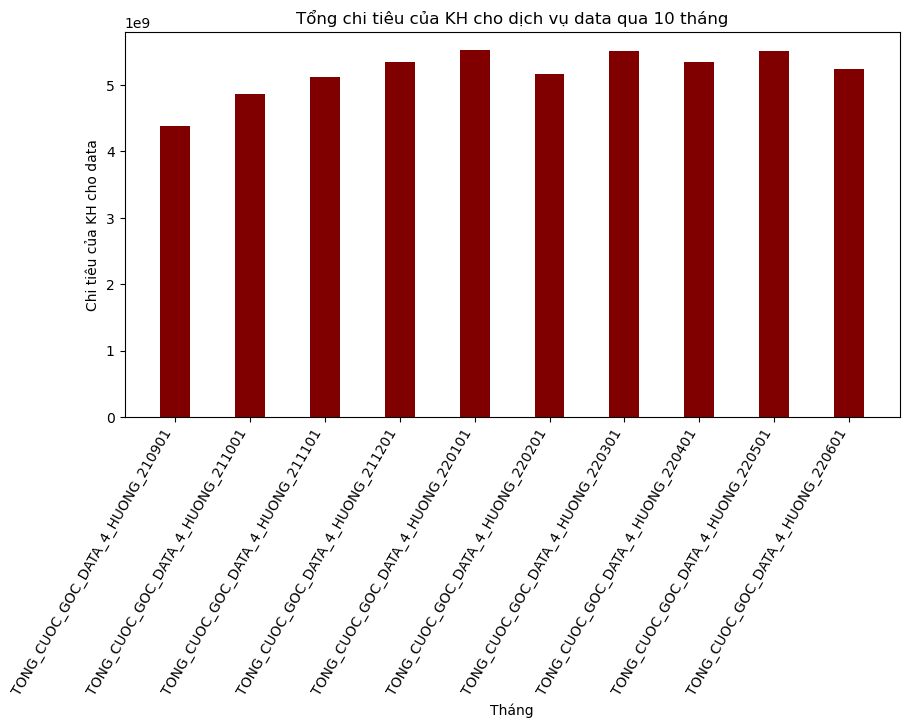

In [38]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df_cuoc_data['index'], df_cuoc_data[0], color ='maroon',
        width = 0.4)
 
plt.xlabel("Tháng")
plt.ylabel("Chi tiêu của KH cho data")
plt.title("Tổng chi tiêu của KH cho dịch vụ data qua 10 tháng")
plt.xticks(rotation=60,ha='right')
plt.show()

In [39]:
df_luu_luong_thoai = df[['LL_THOAI_210901','LL_THOAI_211001','LL_THOAI_211101','LL_THOAI_211201',
   'LL_THOAI_220101','LL_THOAI_220201','LL_THOAI_220301','LL_THOAI_220401',
   'LL_THOAI_220501','LL_THOAI_220601']].sum()/60
df_luu_luong_thoai

LL_THOAI_210901   9171903.07
LL_THOAI_211001   9723823.97
LL_THOAI_211101   9649622.70
LL_THOAI_211201   9750992.38
LL_THOAI_220101   9791659.47
LL_THOAI_220201   8325760.57
LL_THOAI_220301   9522481.35
LL_THOAI_220401   8825621.08
LL_THOAI_220501   8594212.65
LL_THOAI_220601   8144061.57
dtype: float64

In [40]:
df_luu_luong_thoai_1 = df_luu_luong_thoai.reset_index()
df_luu_luong_thoai_1.rename(columns={'index':'Tháng',0:'Lưu_lượng_thoại'})

,Tháng,Lưu_lượng_thoại
0,LL_THOAI_210901,9171903.07
1,LL_THOAI_211001,9723823.97
2,LL_THOAI_211101,9649622.70
3,LL_THOAI_211201,9750992.38
4,LL_THOAI_220101,9791659.47
5,LL_THOAI_220201,8325760.57
6,LL_THOAI_220301,9522481.35
7,LL_THOAI_220401,8825621.08
8,LL_THOAI_220501,8594212.65
9,LL_THOAI_220601,8144061.57


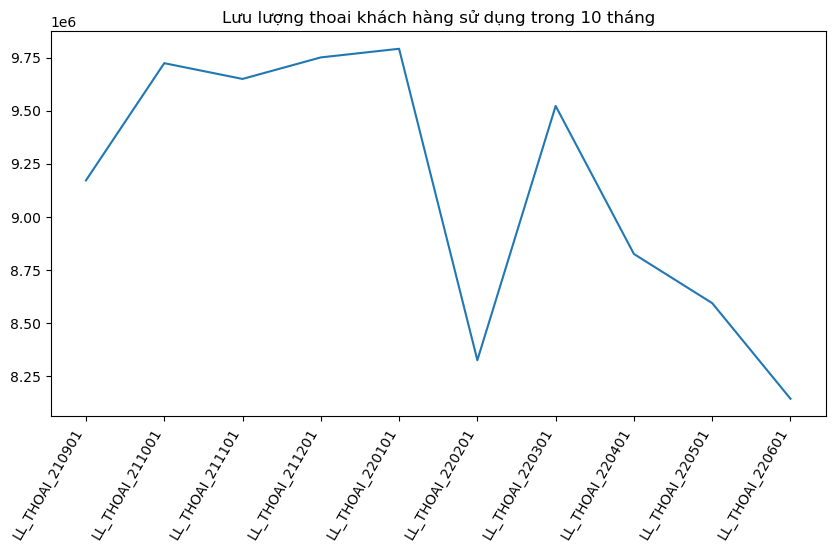

In [41]:
plt.figure(figsize=(10,5)) 
plt.plot(df_luu_luong_thoai)
plt.xticks(rotation=60,ha='right')
plt.title('Lưu lượng thoai khách hàng sử dụng trong 10 tháng')
plt.show()

In [42]:
df_cuoc_thoai = df[['TONG_CUOC_GOC_THOAI_210901',
 'TONG_CUOC_GOC_THOAI_211001',
 'TONG_CUOC_GOC_THOAI_211101',
 'TONG_CUOC_GOC_THOAI_211201',
 'TONG_CUOC_GOC_THOAI_220101',
 'TONG_CUOC_GOC_THOAI_220201',
 'TONG_CUOC_GOC_THOAI_220301',
 'TONG_CUOC_GOC_THOAI_220401',
 'TONG_CUOC_GOC_THOAI_220501',
 'TONG_CUOC_GOC_THOAI_220601']].sum().to_frame().reset_index()
df_cuoc_thoai.rename(columns={'index':'Tháng',0:'Chi tieu cho dich vu thoai'})

,Tháng,Chi tieu cho dich vu thoai
0,TONG_CUOC_GOC_THOAI_210901,3701868003.09
1,TONG_CUOC_GOC_THOAI_211001,4168042435.77
2,TONG_CUOC_GOC_THOAI_211101,4152933014.22
3,TONG_CUOC_GOC_THOAI_211201,4211968645.12
4,TONG_CUOC_GOC_THOAI_220101,4448346745.71
5,TONG_CUOC_GOC_THOAI_220201,3916247894.57
6,TONG_CUOC_GOC_THOAI_220301,4089475718.00
7,TONG_CUOC_GOC_THOAI_220401,3857535678.02
8,TONG_CUOC_GOC_THOAI_220501,3755656468.38
9,TONG_CUOC_GOC_THOAI_220601,3518703268.68


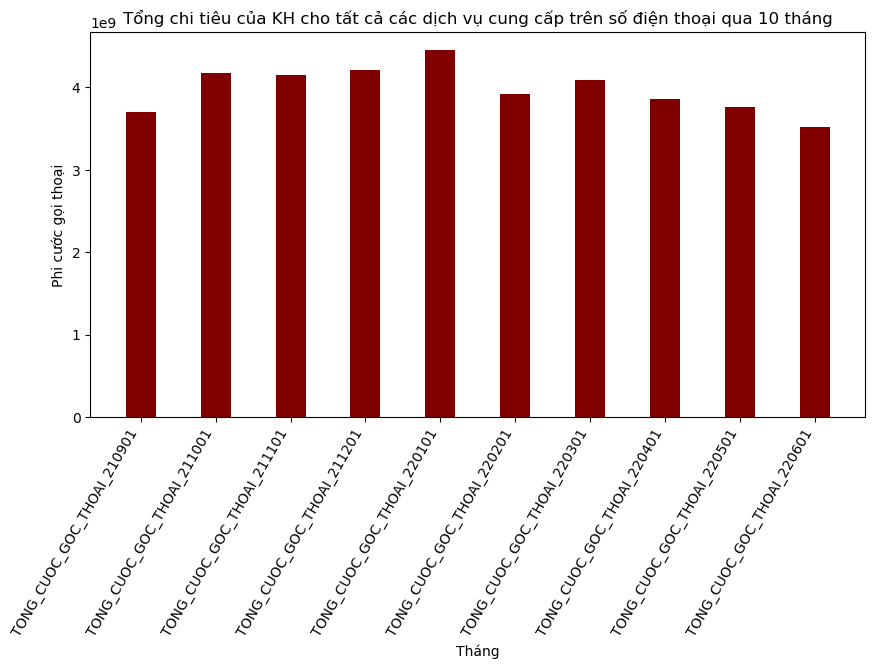

In [43]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df_cuoc_thoai['index'], df_cuoc_thoai[0], color ='maroon',
        width = 0.4)
 
plt.xlabel("Tháng")
plt.ylabel("Phi cước gọi thoại")
plt.title("Tổng chi tiêu của KH cho tất cả các dịch vụ cung cấp trên số điện thoại qua 10 tháng")
plt.xticks(rotation=60,ha='right')
plt.show()

In [44]:
df_thietbi_4 = df['THIET_BI_220401'].value_counts()
df_thietbi_5 = df['THIET_BI_220501'].value_counts()
df_thietbi_6 = df['THIET_BI_220601'].value_counts()


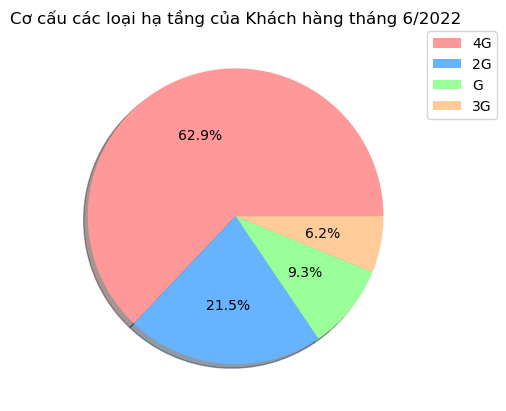

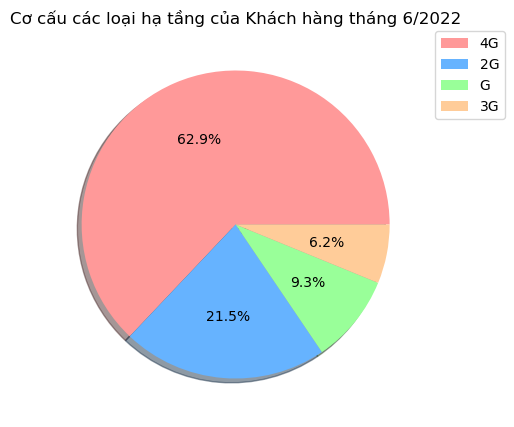

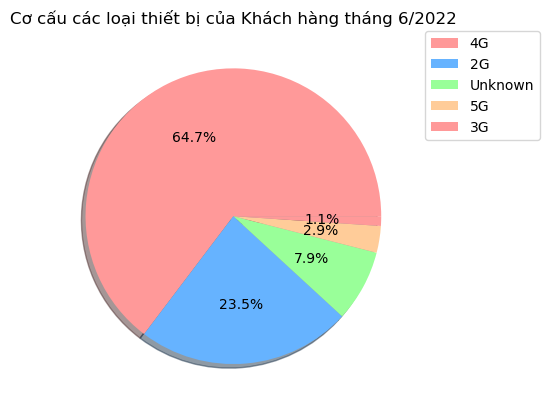

In [45]:
fig = plt.figure(figsize = (20, 5))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.figure(11)
# Create first chart here.
data = df['HA_TANG_220601'].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, colors=colors, legend=True, title='Cơ cấu các loại hạ tầng của Khách hàng tháng 6/2022', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.figure(1)
# Create second chart here.
data = df['HA_TANG_220601'].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True,  colors=colors, legend=True, title='Cơ cấu các loại hạ tầng của Khách hàng tháng 6/2022', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.figure(2)
data = df['THIET_BI_220601'].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True,  colors=colors, legend=True, title='Cơ cấu các loại thiết bị của Khách hàng tháng 6/2022', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.show() #show all figures

In [46]:
df_pb_thietbi = df[[]]
                 

In [47]:
df_ha_tang = df.groupby('HA_TANG_220501')['TONG_LL_GPRS_220501'].sum().reset_index()
df_ha_tang

,HA_TANG_220501,TONG_LL_GPRS_220501
0,2G,90241643387.00
1,3G,19048554660185.00
2,4G,1070575794738907.00
3,G,22527438.00


In [48]:
list(df_ha_tang)

['HA_TANG_220501', 'TONG_LL_GPRS_220501']

In [14]:
tb

HA_TANG_220501
2G        90242008093.00
3G     19049134904039.00
4G   1070987821583687.00
G            22527438.00
Name: TONG_LL_GPRS_220501, dtype: float64

AttributeError: 'NoneType' object has no attribute 'get_bbox'

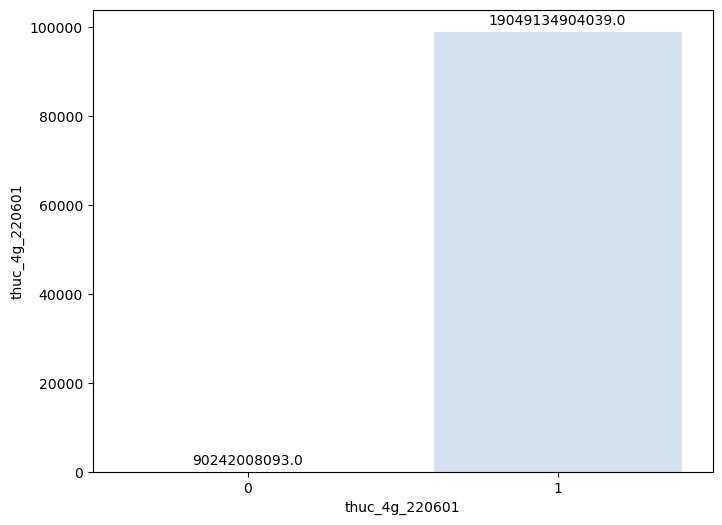

In [13]:
tb =df.groupby('HA_TANG_220501')['TONG_LL_GPRS_220501'].sum()

# get the colors in blues as requested
pal = sns.color_palette("Blues_r", len(tb))

# rank the total_bill sums
rank = tb.argsort()

# plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='thuc_4g_220601', y='thuc_4g_220601', data=df, palette=np.array(pal[::-1])[rank], estimator=sum, ci=False, ax=ax)

# 1. add labels using bar_label with custom labels from tb
ax.bar_label(ax.containers[0], labels=tb, padding=3)

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
ax.set_ylabel('Số user',fontsize=15)
ax.set_title('Số user thực dùng 4G theo tháng',fontsize=20)

plt.show()

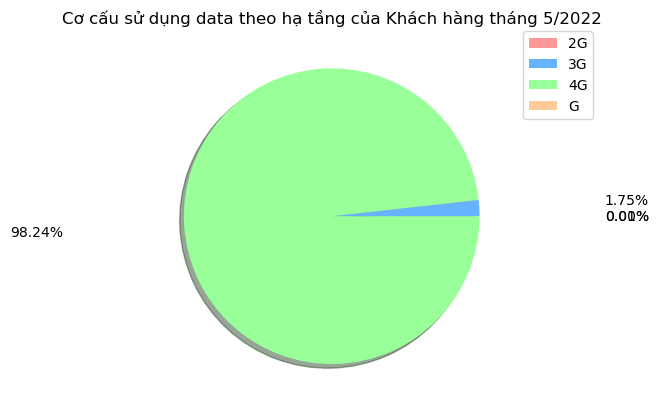

In [50]:
data = df.groupby('HA_TANG_220501')['TONG_LL_GPRS_220501'].sum()
ax = data.plot(kind="pie", autopct='%1.2f%%', shadow=True,  colors=colors, legend=True, title='Cơ cấu sử dụng data theo hạ tầng của Khách hàng tháng 5/2022', ylabel='', labeldistance=None,
              pctdistance=2)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [51]:
df['thuc_4g_220601'].value_counts().reset_index()

,index,thuc_4g_220601
0,0,100707
1,1,99016


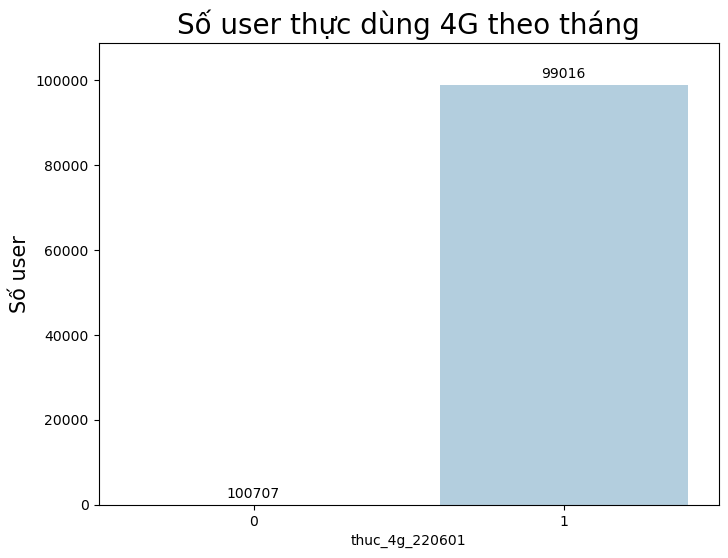

In [52]:
tb =df['thuc_4g_220601'].value_counts()

# get the colors in blues as requested
pal = sns.color_palette("Blues_r", len(tb))

# rank the total_bill sums
rank = tb.argsort()

# plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='thuc_4g_220601', y='thuc_4g_220601', data=df, palette=np.array(pal[::-1])[rank], estimator=sum, ci=False, ax=ax)

# 1. add labels using bar_label with custom labels from tb
ax.bar_label(ax.containers[0], labels=tb, padding=3)

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
ax.set_ylabel('Số user',fontsize=15)
ax.set_title('Số user thực dùng 4G theo tháng',fontsize=20)

plt.show()

In [53]:
df.groupby('HA_TANG_220401')['TONG_LL_GPRS_220401'].sum()

HA_TANG_220401
2G        55209721029.00
3G     19456534693877.00
4G   1016927890052601.00
G              270464.00
Name: TONG_LL_GPRS_220401, dtype: float64

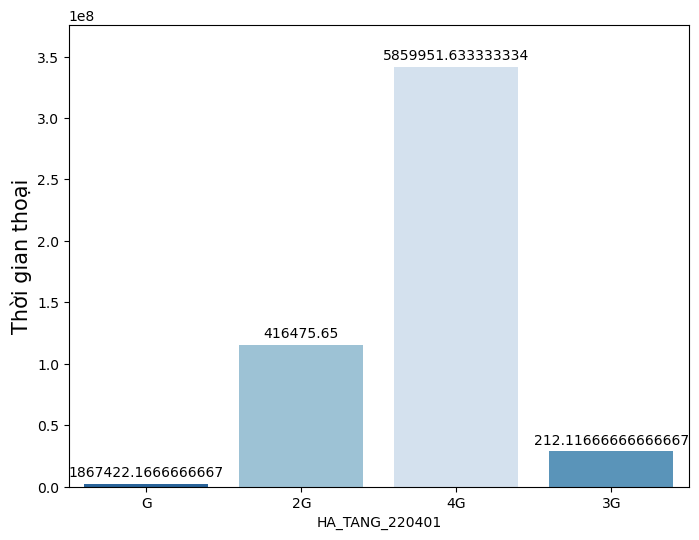

In [54]:
tb =df.groupby('HA_TANG_220601')['LL_THOAI_220601'].sum()/60

# get the colors in blues as requested
pal = sns.color_palette("Blues_r", len(tb))

# rank the total_bill sums
rank = tb.argsort()

# plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='HA_TANG_220401', y='LL_THOAI_220601', data=df, palette=np.array(pal[::-1])[rank], estimator=sum, ci=False, ax=ax)

# 1. add labels using bar_label with custom labels from tb
ax.bar_label(ax.containers[0], labels=tb, padding=3)

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
ax.set_ylabel('Thời gian thoại',fontsize=15)


plt.show()

In [55]:
df.groupby('HA_TANG_220601')['TONG_LL_GPRS_220601'].sum()

HA_TANG_220601
2G       114783634899.00
3G     15048566872097.00
4G   1043344236792682.00
G          1185087668.00
Name: TONG_LL_GPRS_220601, dtype: float64

In [56]:
list(df)

['CUOC_GOC_GPRS_210901',
 'CUOC_GOC_GPRS_211001',
 'CUOC_GOC_GPRS_211101',
 'CUOC_GOC_GPRS_211201',
 'CUOC_GOC_GPRS_220101',
 'CUOC_GOC_GPRS_220201',
 'CUOC_GOC_GPRS_220301',
 'CUOC_GOC_GPRS_220401',
 'CUOC_GOC_GPRS_220501',
 'CUOC_GOC_GPRS_220601',
 'HA_TANG_210901',
 'HA_TANG_211001',
 'HA_TANG_211101',
 'HA_TANG_211201',
 'HA_TANG_220101',
 'HA_TANG_220201',
 'HA_TANG_220301',
 'HA_TANG_220401',
 'HA_TANG_220501',
 'HA_TANG_220601',
 'IS_DCOM_210901',
 'IS_DCOM_211001',
 'IS_DCOM_211101',
 'IS_DCOM_211201',
 'IS_DCOM_220101',
 'IS_DCOM_220201',
 'IS_DCOM_220301',
 'IS_DCOM_220401',
 'IS_DCOM_220501',
 'IS_DCOM_220601',
 'IS_SIM_4G_210901',
 'IS_SIM_4G_211001',
 'IS_SIM_4G_211101',
 'IS_SIM_4G_211201',
 'IS_SIM_4G_220101',
 'IS_SIM_4G_220201',
 'IS_SIM_4G_220301',
 'IS_SIM_4G_220401',
 'IS_SIM_4G_220501',
 'IS_SIM_4G_220601',
 'LL_THOAI_210901',
 'LL_THOAI_211001',
 'LL_THOAI_211101',
 'LL_THOAI_211201',
 'LL_THOAI_220101',
 'LL_THOAI_220201',
 'LL_THOAI_220301',
 'LL_THOAI_220401',


In [57]:
### Hành vi tiêu dùng của khách hàng theo độ tuổi (2022-06-01)

In [58]:
df.groupby('TUOI_KHACH_HANG_cut_level_220601')['TONG_CUOC_GOC_DATA_4_HUONG_220601'].mean()

TUOI_KHACH_HANG_cut_level_220601
0 < X <= 15    24955.28
15 < X <= 25   37738.96
25 < X <= 35   32999.75
35 < X <= 45   25246.50
45 < X <= 55   21329.91
55 < X <= 65   16509.83
65 < X <= 75   13818.45
75 < X         11789.51
X <= 0         22500.00
Name: TONG_CUOC_GOC_DATA_4_HUONG_220601, dtype: float64

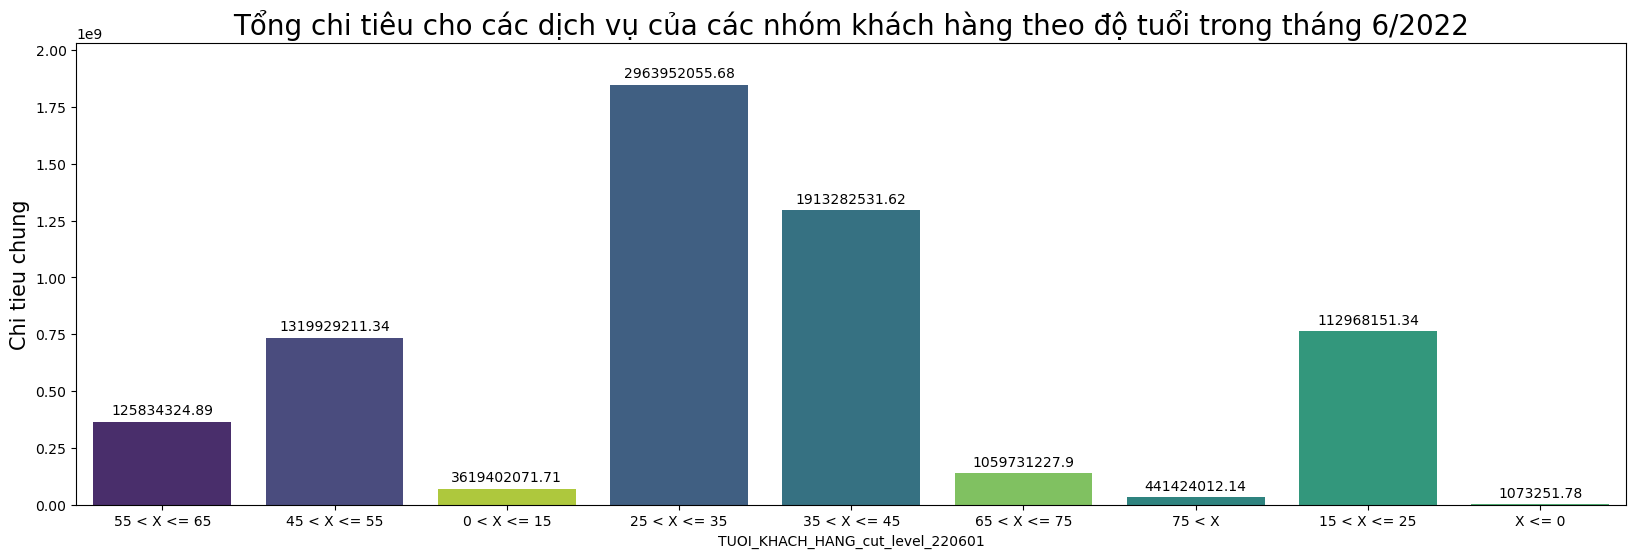

In [59]:
tb = df.groupby('TUOI_KHACH_HANG_cut_level_220601')['TONG_CUOC_GOC_FN_220601'].sum()

# get the colors in blues as requested
pal = sns.color_palette("viridis", len(tb))

# rank the total_bill sums
rank = tb.argsort()

# plot
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='TUOI_KHACH_HANG_cut_level_220601', y='TONG_CUOC_GOC_DATA_4_HUONG_220601', data=df, palette=np.array(pal[::-1])[rank], estimator=sum, ci=False, ax=ax)

# 1. add labels using bar_label with custom labels from tb
ax.bar_label(ax.containers[0], labels=tb, padding=3)

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
ax.set_ylabel('Chi tieu chung',fontsize=15)
ax.set_title('Tổng chi tiêu cho các dịch vụ của các nhóm khách hàng theo độ tuổi trong tháng 6/2022',fontsize=20)

plt.show()

In [60]:
df.groupby('TUOI_KHACH_HANG_cut_level_220601')['TONG_CUOC_GOC_DATA_4_HUONG_220601'].sum()

TUOI_KHACH_HANG_cut_level_220601
0 < X <= 15      70423808.38
15 < X <= 25    763194896.27
25 < X <= 35   1848315768.13
35 < X <= 45   1294286916.02
45 < X <= 55    733578330.54
55 < X <= 65    365247005.74
65 < X <= 75    138281261.01
75 < X           33647268.42
X <= 0             585000.00
Name: TONG_CUOC_GOC_DATA_4_HUONG_220601, dtype: float64

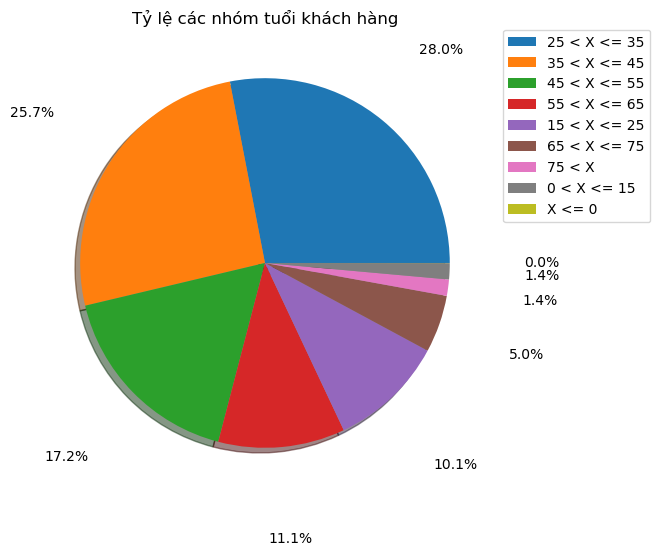

In [61]:
fig, ax = plt.subplots(figsize=(20, 6))
data = df['TUOI_KHACH_HANG_cut_level_220601'].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True,  legend=True, title='Tỷ lệ các nhóm tuổi khách hàng',
               ylabel='', labeldistance=None, pctdistance=1.5)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

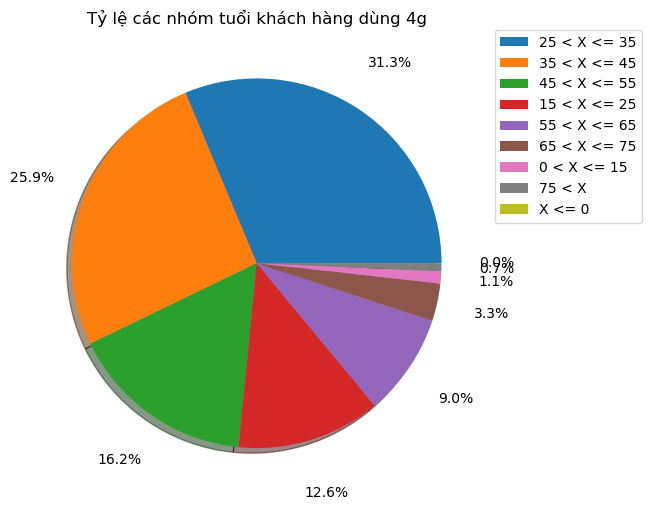

In [62]:
fig, ax = plt.subplots(figsize=(20, 6))
data = df[df['thuc_4g_220601']==1]['TUOI_KHACH_HANG_cut_level_220601'].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True,  legend=True, title='Tỷ lệ các nhóm tuổi khách hàng dùng 4g',
               ylabel='', labeldistance=None, pctdistance=1.3)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [63]:
df.groupby('TUOI_KHACH_HANG_cut_level_220601')['TONG_LL_GPRS_220601'].mean()

TUOI_KHACH_HANG_cut_level_220601
0 < X <= 15    5991811054.90
15 < X <= 25   9454638988.92
25 < X <= 35   6826888437.91
35 < X <= 45   4897420749.01
45 < X <= 55   3793107202.92
55 < X <= 65   2674040563.30
65 < X <= 75   2169928235.77
75 < X         1906918239.56
X <= 0         7167883677.85
Name: TONG_LL_GPRS_220601, dtype: float64

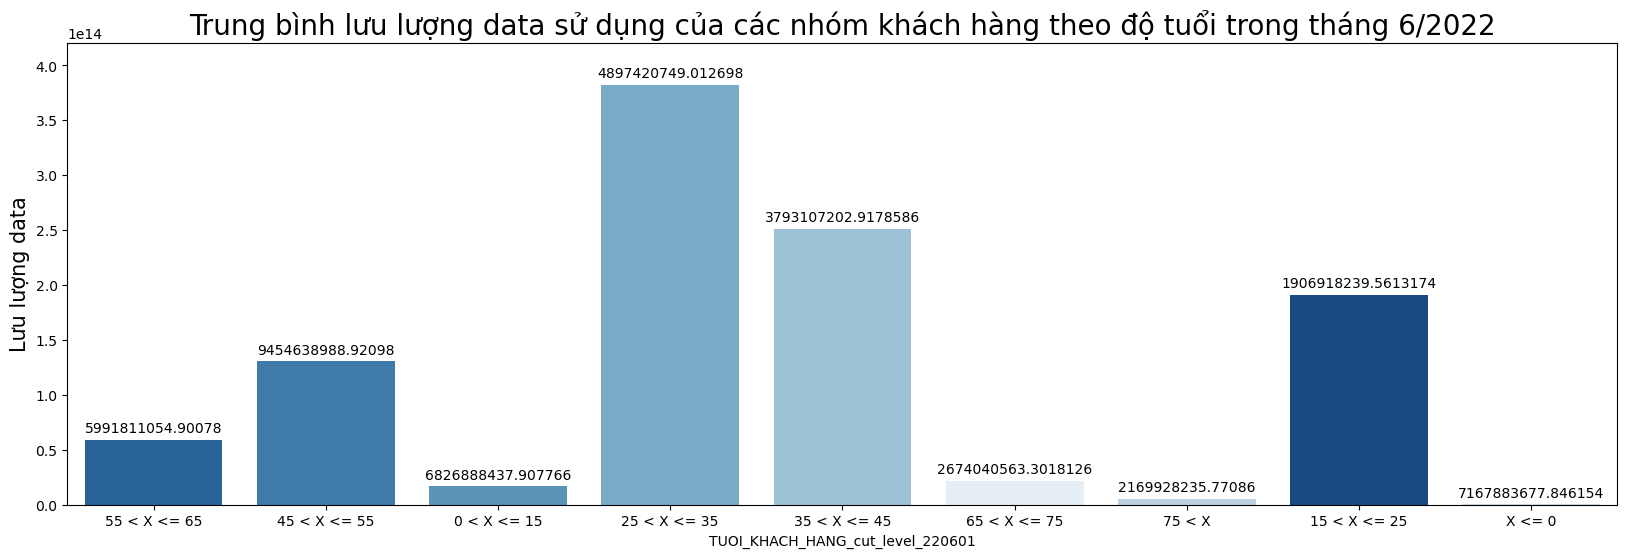

In [64]:
tb = df.groupby('TUOI_KHACH_HANG_cut_level_220601')['TONG_LL_GPRS_220601'].mean()

# get the colors in blues as requested
pal = sns.color_palette("Blues_r", len(tb))

# rank the total_bill sums
rank = tb.argsort()

# plot
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='TUOI_KHACH_HANG_cut_level_220601', y='TONG_LL_GPRS_220601', data=df, palette=np.array(pal[::-1])[rank], estimator=sum, ci=False, ax=ax)

# 1. add labels using bar_label with custom labels from tb
ax.bar_label(ax.containers[0], labels=tb, padding=3)

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
ax.set_ylabel('Lưu lượng data',fontsize=15)
ax.set_title('Trung bình lưu lượng data sử dụng của các nhóm khách hàng theo độ tuổi trong tháng 6/2022',fontsize=20)

plt.show()

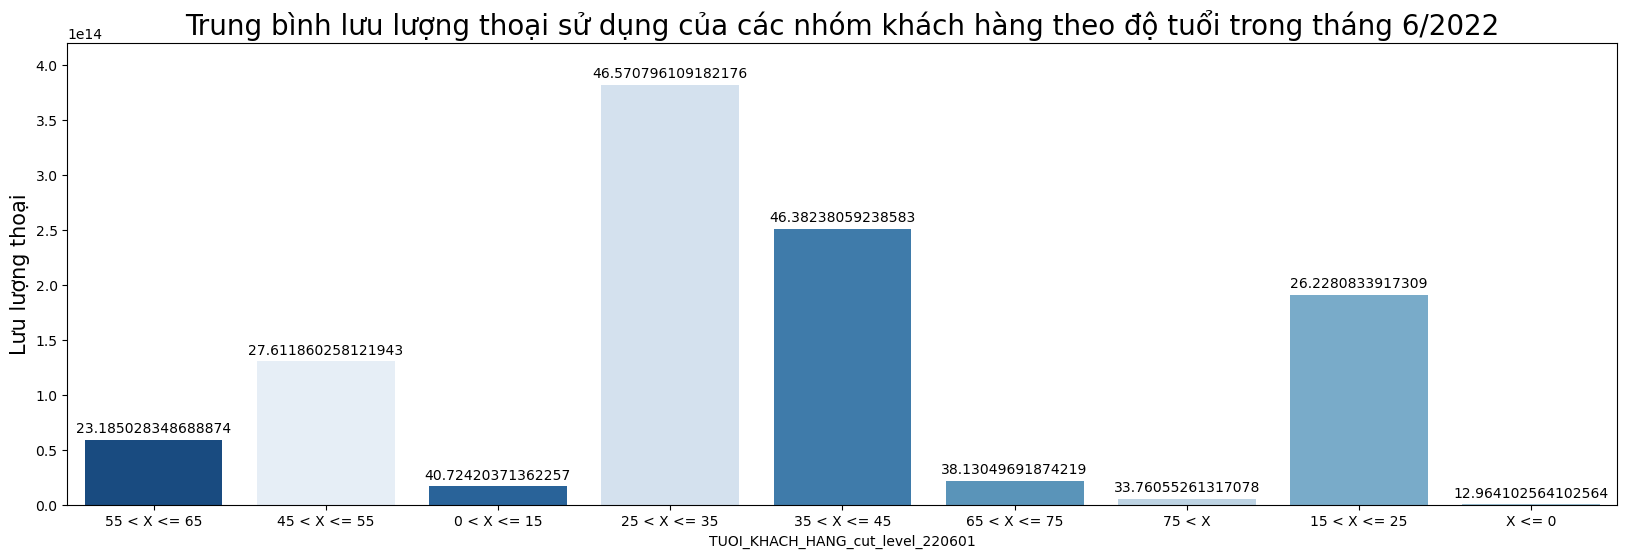

In [65]:

tb = df.groupby('TUOI_KHACH_HANG_cut_level_220601')['LL_THOAI_220601'].mean()/60

# get the colors in blues as requested
pal = sns.color_palette("Blues_r", len(tb))

# rank the total_bill sums
rank = tb.argsort()

# plot
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='TUOI_KHACH_HANG_cut_level_220601', y='TONG_LL_GPRS_220601', data=df, palette=np.array(pal[::-1])[rank], estimator=sum, ci=False, ax=ax)

# 1. add labels using bar_label with custom labels from tb
ax.bar_label(ax.containers[0], labels=tb, padding=3)

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)
ax.set_ylabel('Lưu lượng thoại',fontsize=15)
ax.set_title('Trung bình lưu lượng thoại sử dụng của các nhóm khách hàng theo độ tuổi trong tháng 6/2022',fontsize=20)

plt.show()

In [66]:
df.groupby('TUOI_KHACH_HANG_cut_level_220601')['TONG_TIEN_NAP_TOPUP_220601'].sum()

TUOI_KHACH_HANG_cut_level_220601
0 < X <= 15      62427000.00
15 < X <= 25    793781200.00
25 < X <= 35   2129323800.00
35 < X <= 45   1482897500.00
45 < X <= 55    830463200.00
55 < X <= 65    417465500.00
65 < X <= 75    156383500.00
75 < X           41012000.00
X <= 0             280000.00
Name: TONG_TIEN_NAP_TOPUP_220601, dtype: float64

### Processing Data

In [67]:
objects = [f for f in df.columns if df.dtypes[f]=='object']
i=1
for obj in objects:
    print(i, '/', obj, '\t', len(df[obj].unique()) , ':', df[obj].unique())
    i+=1

1 / HA_TANG_210901 	 4 : ['-1G' '2G' '4G' '3G']
2 / HA_TANG_211001 	 4 : ['-1G' '2G' '4G' '3G']
3 / HA_TANG_211101 	 4 : ['-1G' '2G' '4G' '3G']
4 / HA_TANG_211201 	 4 : ['-1G' '2G' '4G' '3G']
5 / HA_TANG_220101 	 4 : ['G' '2G' '4G' '3G']
6 / HA_TANG_220201 	 4 : ['G' '2G' '4G' '3G']
7 / HA_TANG_220301 	 4 : ['G' '2G' '4G' '3G']
8 / HA_TANG_220401 	 4 : ['G' '2G' '4G' '3G']
9 / HA_TANG_220501 	 4 : ['G' '2G' '4G' '3G']
10 / HA_TANG_220601 	 4 : ['G' '2G' '4G' '3G']
11 / THIET_BI_210901 	 4 : ['Unknown' '2G' '4G' '3G']
12 / THIET_BI_211001 	 5 : ['Unknown' '2G' '4G' '5G' '3G']
13 / THIET_BI_211101 	 5 : ['Unknown' '2G' '4G' '3G' '5G']
14 / THIET_BI_211201 	 5 : ['Unknown' '2G' '4G' '5G' '3G']
15 / THIET_BI_220101 	 5 : ['Unknown' '2G' '4G' '5G' '3G']
16 / THIET_BI_220201 	 5 : ['Unknown' '2G' '4G' '5G' '3G']
17 / THIET_BI_220301 	 5 : ['Unknown' '2G' '4G' '3G' '5G']
18 / THIET_BI_220401 	 5 : ['Unknown' '2G' '4G' '3G' '5G']
19 / THIET_BI_220501 	 5 : ['Unknown' '2G' '4G' '5G' '3G']
20 / 

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199723 entries, 0 to 199999
Columns: 182 entries, CUOC_GOC_GPRS_210901 to user_id
dtypes: float64(152), int64(9), object(21)
memory usage: 278.8+ MB


In [69]:
# Filter data by condition customers has 4G sim and still not use 4G pack of data in previous month
df_filter = df[(df["IS_SIM_4G_220501"] == 1)&(df["thuc_4g_220501"] == 0)]

In [70]:
df_filter['HA_TANG_210901'].unique()

array(['4G', '2G', '-1G', '3G'], dtype=object)

In [71]:
df_test1 = df[(df["IS_SIM_4G_220501"] == 1)&(df["thuc_4g_220501"] == 0) & (df['THIET_BI_220501'] == '4G')]
df_test1

,CUOC_GOC_GPRS_210901,CUOC_GOC_GPRS_211001,CUOC_GOC_GPRS_211101,CUOC_GOC_GPRS_211201,CUOC_GOC_GPRS_220101,CUOC_GOC_GPRS_220201,CUOC_GOC_GPRS_220301,CUOC_GOC_GPRS_220401,CUOC_GOC_GPRS_220501,CUOC_GOC_GPRS_220601,...,TONG_TIEN_NAP_TOPUP_211101,TONG_TIEN_NAP_TOPUP_211201,TONG_TIEN_NAP_TOPUP_220101,TONG_TIEN_NAP_TOPUP_220201,TONG_TIEN_NAP_TOPUP_220301,TONG_TIEN_NAP_TOPUP_220401,TONG_TIEN_NAP_TOPUP_220501,TONG_TIEN_NAP_TOPUP_220601,TUOI_KHACH_HANG_cut_level_220601,user_id
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45 < X <= 55,839437000000.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,20000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35 < X <= 45,908914000000.00
17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,5000.00,60000.00,0.00,20000.00,10000.00,10000.00,0.00,35 < X <= 45,574645000000.00
18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25 < X <= 35,562409000000.00
21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25 < X <= 35,267030000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199896,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35 < X <= 45,245439000000.00
199897,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,50000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35 < X <= 45,569189000000.00
199909,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25 < X <= 35,289034000000.00
199914,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,50000.00,0.00,0.00,0.00,0.00,35 < X <= 45,863178000000.00


In [72]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_test1['HA_TANG_210901']= label_encoder.fit_transform(df_test1['HA_TANG_210901'])
df_test1['HA_TANG_211001']= label_encoder.fit_transform(df_test1['HA_TANG_211001'])
df_test1['HA_TANG_211101']= label_encoder.fit_transform(df_test1['HA_TANG_211101'])
df_test1['HA_TANG_211201']= label_encoder.fit_transform(df_test1['HA_TANG_211201'])
df_test1['HA_TANG_220101']= label_encoder.fit_transform(df_test1['HA_TANG_220101'])
df_test1['HA_TANG_220201']= label_encoder.fit_transform(df_test1['HA_TANG_220201'])
df_test1['HA_TANG_220301']= label_encoder.fit_transform(df_test1['HA_TANG_220301'])
df_test1['HA_TANG_220401']= label_encoder.fit_transform(df_test1['HA_TANG_220401'])
df_test1['HA_TANG_220501']= label_encoder.fit_transform(df_test1['HA_TANG_220501'])
  


# Build the train data set
df_train = df_test1.drop(['user_id', 
'HA_TANG_210901',
 'HA_TANG_211001',
 'HA_TANG_211101',
 'HA_TANG_211201',
 'HA_TANG_220101',
 'HA_TANG_220201',
 'HA_TANG_220301',
 'HA_TANG_220401',
 'HA_TANG_220501',
 'HA_TANG_220601',
'IS_SIM_4G_210901',
 'IS_SIM_4G_211001',
 'IS_SIM_4G_211101',
 'IS_SIM_4G_211201',
 'IS_SIM_4G_220101',
 'IS_SIM_4G_220201',
 'IS_SIM_4G_220301',
 'IS_SIM_4G_220401',
 'IS_SIM_4G_220501',
 'IS_SIM_4G_220601',
'THIET_BI_210901',
 'THIET_BI_211001',
 'THIET_BI_211101',
 'THIET_BI_211201',
 'THIET_BI_220101',
 'THIET_BI_220201',
 'THIET_BI_220301',
 'THIET_BI_220401',
 'THIET_BI_220501',
 'THIET_BI_220601'], axis=1)
df_train.shape

In [73]:
# Build the train data set
df_train = df_test1.drop(['user_id', 
 'HA_TANG_220601',
'IS_SIM_4G_210901',
 'IS_SIM_4G_211001',
 'IS_SIM_4G_211101',
 'IS_SIM_4G_211201',
 'IS_SIM_4G_220101',
 'IS_SIM_4G_220201',
 'IS_SIM_4G_220301',
 'IS_SIM_4G_220401',
 'IS_SIM_4G_220501',
 'IS_SIM_4G_220601',
'THIET_BI_210901',
 'THIET_BI_211001',
 'THIET_BI_211101',
 'THIET_BI_211201',
 'THIET_BI_220101',
 'THIET_BI_220201',
 'THIET_BI_220301',
 'THIET_BI_220401',
 'THIET_BI_220501',
 'THIET_BI_220601'], axis=1)
df_train.shape

(35158, 160)

In [74]:
# Create the target data set
y = df_train["thuc_4g_220601"]
y.value_counts()

0    28070
1     7088
Name: thuc_4g_220601, dtype: int64

In [75]:
X = df_train.drop(['thuc_4g_220601','CUOC_GOC_GPRS_220601','LL_THOAI_220601','NOD_PSLL_THOAI_220601',
   'SO_LAN_NAP_THE_220601','SO_LAN_NAP_TOPUP_220601','SO_NGAY_SU_DUNG_220601',
  'thuc_4g_220601','TONG_CUOC_GOC_DATA_4_HUONG_220601','TONG_CUOC_GOC_FN_220601','TONG_CUOC_GOC_THOAI_220601',
  'TONG_LL_GPRS_220601','TONG_TIEN_NAP_THE_220601','TONG_TIEN_NAP_TOPUP_220601'], axis=1)

X

,CUOC_GOC_GPRS_210901,CUOC_GOC_GPRS_211001,CUOC_GOC_GPRS_211101,CUOC_GOC_GPRS_211201,CUOC_GOC_GPRS_220101,CUOC_GOC_GPRS_220201,CUOC_GOC_GPRS_220301,CUOC_GOC_GPRS_220401,CUOC_GOC_GPRS_220501,HA_TANG_210901,...,TONG_TIEN_NAP_TOPUP_210901,TONG_TIEN_NAP_TOPUP_211001,TONG_TIEN_NAP_TOPUP_211101,TONG_TIEN_NAP_TOPUP_211201,TONG_TIEN_NAP_TOPUP_220101,TONG_TIEN_NAP_TOPUP_220201,TONG_TIEN_NAP_TOPUP_220301,TONG_TIEN_NAP_TOPUP_220401,TONG_TIEN_NAP_TOPUP_220501,TUOI_KHACH_HANG_cut_level_220601
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45 < X <= 55
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,...,0.00,20000.00,20000.00,0.00,0.00,0.00,0.00,0.00,0.00,35 < X <= 45
17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,...,20000.00,0.00,0.00,5000.00,60000.00,0.00,20000.00,10000.00,10000.00,35 < X <= 45
18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25 < X <= 35
21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25 < X <= 35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199896,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35 < X <= 45
199897,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,...,0.00,20000.00,50000.00,0.00,0.00,0.00,0.00,0.00,0.00,35 < X <= 45
199909,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25 < X <= 35
199914,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,...,0.00,0.00,0.00,0.00,0.00,50000.00,0.00,0.00,0.00,35 < X <= 45


In [76]:
# Labeling data from TUOI_KHACH_HANG_cut_level_220601 columns to one hot coder

In [77]:
dummies = pd.get_dummies(X["TUOI_KHACH_HANG_cut_level_220601"])
dummies

,0 < X <= 15,15 < X <= 25,25 < X <= 35,35 < X <= 45,45 < X <= 55,55 < X <= 65,65 < X <= 75,75 < X,X <= 0
5,0,0,0,0,1,0,0,0,0
8,0,0,0,1,0,0,0,0,0
17,0,0,0,1,0,0,0,0,0
18,0,0,1,0,0,0,0,0,0
21,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
199896,0,0,0,1,0,0,0,0,0
199897,0,0,0,1,0,0,0,0,0
199909,0,0,1,0,0,0,0,0,0
199914,0,0,0,1,0,0,0,0,0


In [78]:
X = pd.concat([X, dummies], axis=1)

In [79]:
X = X.drop(["TUOI_KHACH_HANG_cut_level_220601"], axis=1)

In [80]:
X.shape

(35158, 155)

In [81]:
X['NOD_PSLL_DATA_220601']

5         29
8          6
17         7
18         0
21         5
          ..
199896     0
199897     2
199909     8
199914    30
199920     0
Name: NOD_PSLL_DATA_220601, Length: 35158, dtype: int64

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

### Decision tree

In [83]:

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
DCT = accuracy_score(y_test, y_pred)
print("The Accuracy for DecisionTree is {}".format(DCT))

[[5437  215]
 [1119  261]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5652
           1       0.55      0.19      0.28      1380

    accuracy                           0.81      7032
   macro avg       0.69      0.58      0.59      7032
weighted avg       0.77      0.81      0.77      7032

The Accuracy for DecisionTree is 0.8102957906712173


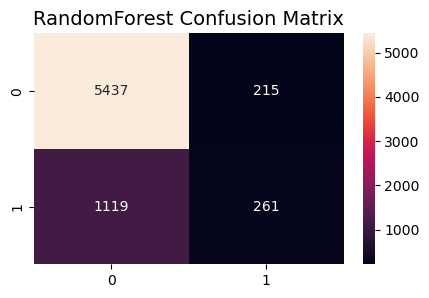

In [84]:

plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k")
    
plt.title("RandomForest Confusion Matrix",fontsize=14)
plt.show()

In [86]:
feature_importance = pd.DataFrame({'Feature':X.columns,'Importance':tree.feature_importances_})
feature_importance.sort_values(by='Importance',ascending = False)

,Feature,Importance
46,NOD_PSLL_DATA_220601,0.40
90,thuc_4g_220401,0.28
82,SO_NGAY_SU_DUNG_220501,0.10
106,TONG_CUOC_GOC_FN_220201,0.06
45,NOD_PSLL_DATA_220501,0.05
...,...,...
55,NOD_PSLL_THOAI_220501,0.00
56,SO_LAN_NAP_THE_210901,0.00
57,SO_LAN_NAP_THE_211001,0.00
58,SO_LAN_NAP_THE_211101,0.00


### Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
RDF = accuracy_score(y_test, y_pred)
print("The Accuracy for RandomForest is {}".format(RDF))

[[5499  153]
 [1116  264]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      5652
           1       0.63      0.19      0.29      1380

    accuracy                           0.82      7032
   macro avg       0.73      0.58      0.60      7032
weighted avg       0.79      0.82      0.78      7032

The Accuracy for RandomForest is 0.8195392491467577


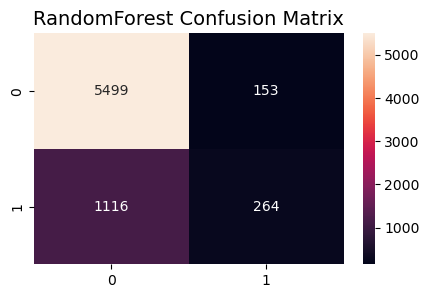

In [88]:

plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k")
    
plt.title("RandomForest Confusion Matrix",fontsize=14)
plt.show()
     

In [90]:
feature_importance = pd.DataFrame({'Feature':X.columns,'Importance':rf.feature_importances_})
feature_importance.sort_values(by='Importance',ascending = False)

,Feature,Importance
46,NOD_PSLL_DATA_220601,0.06
108,TONG_CUOC_GOC_FN_220401,0.02
82,SO_NGAY_SU_DUNG_220501,0.02
127,TONG_LL_GPRS_220501,0.02
109,TONG_CUOC_GOC_FN_220501,0.01
...,...,...
25,IS_DCOM_220401,0.00
24,IS_DCOM_220301,0.00
26,IS_DCOM_220501,0.00
91,thuc_4g_220501,0.00


In [91]:
feature_importance[feature_importance['Importance'] < 0.01]['Feature']

0      CUOC_GOC_GPRS_210901
1      CUOC_GOC_GPRS_211001
2      CUOC_GOC_GPRS_211101
3      CUOC_GOC_GPRS_211201
4      CUOC_GOC_GPRS_220101
               ...         
150            45 < X <= 55
151            55 < X <= 65
152            65 < X <= 75
153                  75 < X
154                  X <= 0
Name: Feature, Length: 112, dtype: object

In [92]:
lst_not_cov = list(feature_importance[feature_importance['Importance'] < 0.01]['Feature'])
len(lst_not_cov)

112